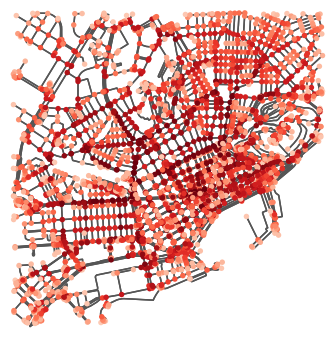

In [5]:
import osmnx as ox
import networkx as nx
import pandas as pd
from pandas import DataFrame

G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')

# node betweenness centrality
G2 = nx.DiGraph(G)

node_betweenness_centrality = nx.betweenness_centrality(G2, weight='length',normalized=True)

# plot it
df = pd.DataFrame(data=pd.Series(node_betweenness_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='Reds', start=0.2)
df = df.reindex(G2.nodes())
nc = df['colors'].tolist()

fig, ax = ox.plot_graph(G, node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)